# Graph Theory Module 1 Computational Challenge

In [1]:
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt

def is_connected(A, D):
    eigval = np.linalg.eig(D-A)[0] # The multiplicity of the zero eigenvalue of the Laplacian is the number of components.
    zeros = np.count_nonzero(eigval<=1e-12) # Accounting for floating point error.
    if(zeros == 1):
        return True
    else:
        return False

def generate_connected_graph(N,K):
    A = np.zeros((N,N))
    D = np.zeros((N,N))
    edges = []
    
    while(True):
        i, j = random.sample(range(0,N), 2)
        if(A[i,j] == 0 and A[j,i] == 0):
            edges.append((i,j))
            edges.append((j,i))
            A[i,j] = 1
            A[j,i] = 1
            D[i,i] += 1
            D[j,j] += 1
        if(is_connected(A, D) and len(edges) >= K):
            return A, D, edges

def diagonalize(M): # We can diagonalize a matrix with unique eigenvalues as A = PDP^-1, where D has eigenvalues down the main diagonal and P has eigenvectors as columns.
    eigval, eigvec = np.linalg.eig(M)

    D = np.diag(eigval)
    P = np.row_stack(eigvec)
    return P, D

def loop_prob(A,l):
    # It is important to 
    A_row = [np.sum(A[i,:]) for i in range(0,N)]
    A_p = np.array([[A[i,j]/A_row[i] for i in range(0,N)] for j in range(0,N)])
    L = np.linalg.matrix_power(A_p,l)
    return [L[i,i]/np.sum(L[i,:]) for i in range(0,N)]
    

In [2]:
# N = 7
# min_K = 11

# A, D, K = generate_connected_graph(N,min_K) # adjacency, degree, edges
# A, D, K

In [3]:
# D_P, D_D = diagonalize(D) # D_P = degree matrix P, D_D = degree matrix D
# A_P, A_D = diagonalize(A) # A_P = adjacency matrix P, A_D = adjacency matrix D
# D_D, np.round(A_D,1)

100: [0.143 0.143 0.143 0.143 0.143 0.143 0.143]
A:
 [[ 2.807  0.     0.     0.     0.     0.     0.   ]
 [ 0.    -1.858  0.     0.     0.     0.     0.   ]
 [ 0.     0.    -1.691  0.     0.     0.     0.   ]
 [ 0.     0.     0.     1.122  0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.678  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.298  0.   ]
 [ 0.     0.     0.     0.     0.     0.    -0.   ]]
D:
 [[4. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 0. 0. 0. 0. 4.]]


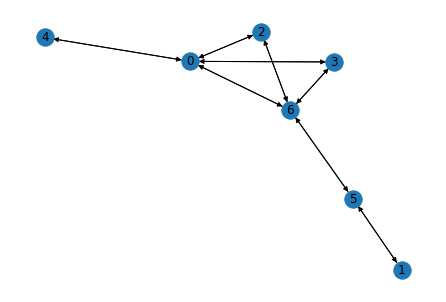


------------------------

REMOVED: (5, 6)
100: [0.211 0.286 0.2   0.2   0.226 0.286 0.163]
A:
 [[ 2.686  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.335  0.     0.     0.     0.     0.   ]
 [ 0.     0.    -1.749  0.     0.     0.     0.   ]
 [ 0.     0.     0.    -1.271  0.     0.     0.   ]
 [ 0.     0.     0.     0.    -1.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     1.     0.   ]
 [ 0.     0.     0.     0.     0.     0.    -0.   ]]
D:
 [[4. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 4.]]


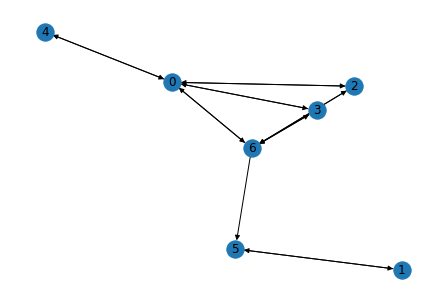


------------------------

REMOVED: (1, 5)
100: [nan nan nan nan nan nan nan]
A:
 [[ 2.686  0.     0.     0.     0.     0.     0.   ]
 [ 0.    -1.749  0.     0.     0.     0.     0.   ]
 [ 0.     0.    -1.271  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.335  0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]]
D:
 [[4. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 4.]]


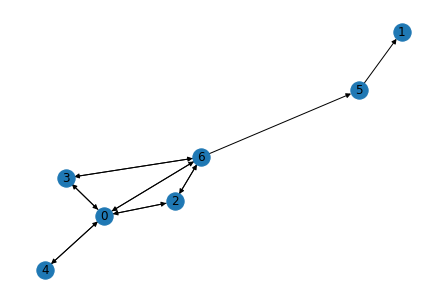


------------------------

REMOVED: (6, 3)
100: [nan nan nan nan nan nan nan]
A:
 [[ 2.461  0.     0.     0.     0.     0.     0.   ]
 [ 0.    -1.7    0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.239  0.     0.     0.     0.   ]
 [ 0.     0.     0.    -1.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]]
D:
 [[4. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 3.]]


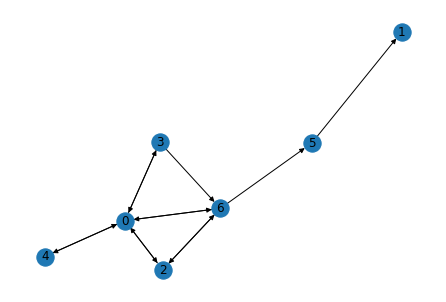


------------------------

REMOVED: (6, 0)
100: [nan nan nan nan nan nan nan]
A:
 [[ 2.061  0.     0.     0.     0.     0.     0.   ]
 [ 0.    -1.764  0.     0.     0.     0.     0.   ]
 [ 0.     0.    -0.694  0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.396  0.     0.     0.   ]
 [ 0.     0.     0.     0.    -0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]]
D:
 [[4. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 2.]]


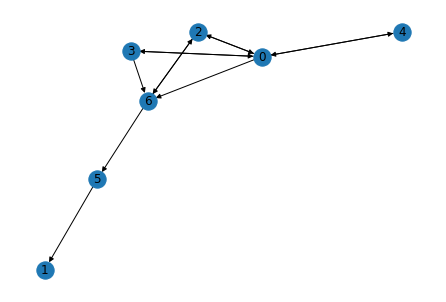


------------------------

REMOVED: (0, 3)
100: [nan nan nan nan nan nan nan]
A:
 [[ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     1.802  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.445  0.     0.     0.     0.   ]
 [ 0.     0.     0.    -1.     0.     0.     0.   ]
 [ 0.     0.     0.     0.    -1.247  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]]
D:
 [[3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 2.]]


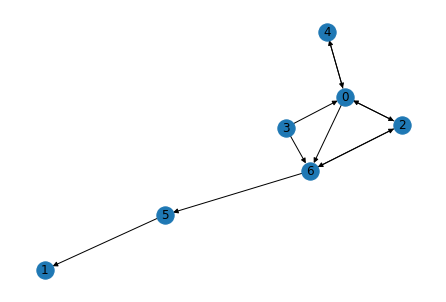


------------------------

REMOVED: (6, 2)
100: [nan nan nan nan nan nan nan]
A:
 [[ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    -1.414  0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     1.414  0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]]
D:
 [[3. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


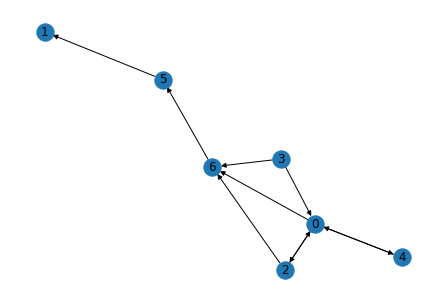


------------------------

REMOVED: (0, 4)
100: [nan nan nan nan nan nan nan]
A:
 [[ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  0.  0.]
 [ 0.  0.  0. -1.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.]]
D:
 [[2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 2. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


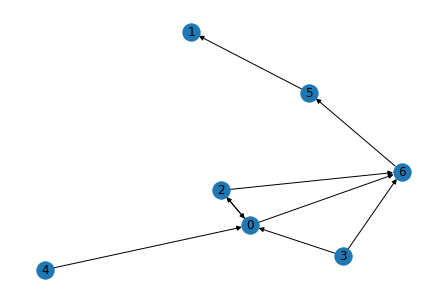


------------------------

REMOVED: (2, 0)
100: [nan nan nan nan nan nan nan]
A:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
D:
 [[2. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


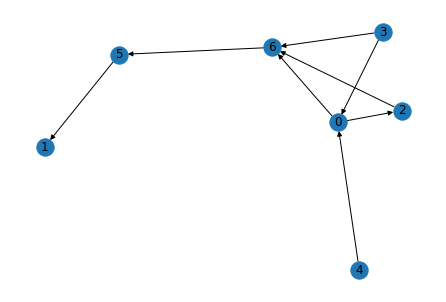


------------------------

REMOVED: (0, 2)
100: [nan nan nan nan nan nan nan]
A:
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
D:
 [[1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 2. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1.]]


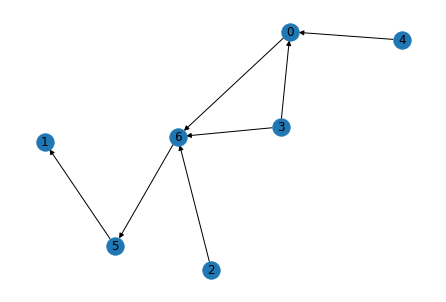


------------------------

REMOVED: (3, 0)


In [4]:
%matplotlib inline
N = 7
min_K = 11
A, D, K = generate_connected_graph(N,min_K) # adjacency, degree, edges

while(True):
    A_P, A_D = diagonalize(A) # A_P = adjacency matrix P, A_D = adjacency matrix D
    print("100:", np.round(loop_prob(A, 100),3))
    print("A:\n",np.round(A_D, 3))
    print("D:\n",D) # The degree matrix is already diagonalized.
    G = nx.from_numpy_matrix(A, create_using=nx.DiGraph)  
    nx.draw(G, with_labels=True)
    plt.show()
    print("\n------------------------\n")
    
    # remove edge but maintain connectedness
    while(True):
        random.shuffle(K)
        A_r = np.copy(A)
        D_r = np.copy(D)
        A_r[K[0][0], K[0][1]] = 0
        D_r[K[0][0], K[0][0]] -= 1
        if(is_connected(A_r, D_r)):
            print("REMOVED:", K[0])
            K = K[1:]
            A = A_r
            D = D_r
            break
    if(len(K) <= N-1):
        break